# Clustering and Classification with Python


#### Student no : 21727816
#### Student name : Ozar Ömer Uncu



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as cov 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

At this assignment we have to find how we can detect haricot species with machine learning methods. We take our action from features created by digitizing the images of the various haricot beans. At last we need to cluster and clasify these datas according to the types of haricot species. 

## Data Understanding<a class="anchor" id="data_understanding"></a>

C:\Users\ozaro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


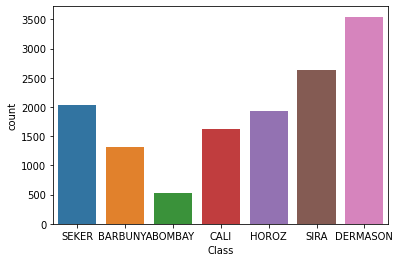

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [2]:
df = pd.read_csv("data.csv")
df.describe()
sns.countplot(df['Class'],label="Count")
df_copy = df.copy()
class_df = df.copy()
plt.show()
df.describe()


From above we can access all details about data We have 13611 rows. Also we can see attributes of the data. 

C:\Users\ozaro\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\ozaro\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


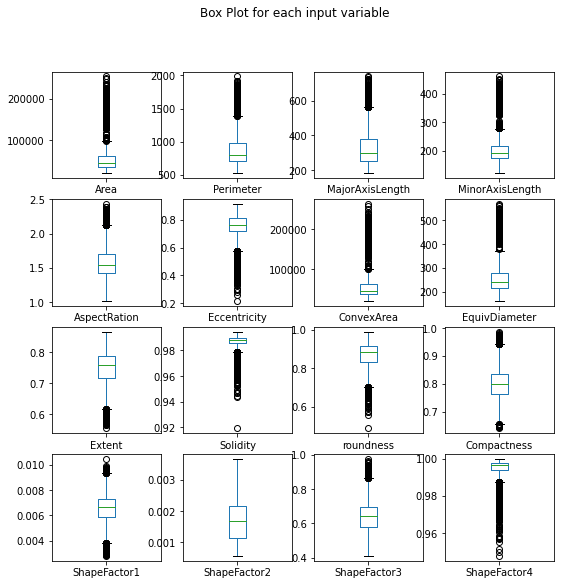

In [3]:
class_df.drop('Class', axis=1).plot(kind='box', 
        subplots=True, layout=(4,4), sharex=False, 
        sharey=False, figsize=(9,9), 
        title='Box Plot for each input variable')
plt.savefig('haricots')
plt.show()


## Data Preparation<a class="anchor" id="data_preparation"></a>

   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   788    610.291       208.178117       173.888747      1.197191   
1   848    638.018       200.524796       182.734419      1.097356   
2   982    624.110       212.826130       175.931143      1.209713   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  


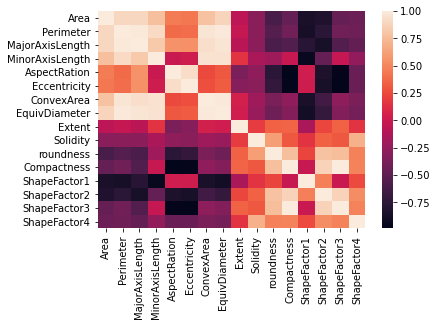

In [4]:
df = df.drop(labels = "Class",axis = 1)
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0])
corr = df.corr()
sns.heatmap(corr)
print(df.head(3))

First, I need to drop Class column for the clustering data. After that I created corelation graph for which data column that I am gona drop. Because some of the columns act same. So I dropped one element from these pairs. If they have similarity above 0.90 I drop one of them.

In [5]:
columns = np.full((corr.shape[0] ), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
a = 0
for (columnName, columnData) in df.iteritems():
    if columns[a]==False:
        df = df.drop(labels = columnName, axis = 1)
    a+=1
df.describe()

,Area,Perimeter,AspectRation,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,5865.727500,855.283459,1.583242,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.995063
std,3401.613043,214.289696,0.246678,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.004366
min,0.000000,524.736000,1.024868,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.947687
25%,2955.500000,703.523500,1.432307,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.993703
50%,5759.000000,794.941000,1.551124,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.996386
75%,8763.500000,977.213000,1.707109,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.997883
max,12010.000000,1985.370000,2.430306,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.999733


I normalized data for the clustering. At the below you can see difference of the normalized data from our restricted data.

   Area  Perimeter  AspectRation    Extent  Solidity  roundness  Compactness  \
0   788    610.291      1.197191  0.763923  0.988856   0.958027     0.913358   
1   848    638.018      1.097356  0.783968  0.984986   0.887034     0.953861   
2   982    624.110      1.209713  0.778113  0.989559   0.947849     0.908774   
3  1129    645.884      1.153638  0.782681  0.976696   0.903936     0.928329   
4  1169    620.134      1.060798  0.773098  0.990893   0.984877     0.970516   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  
0      0.007332      0.003147      0.998724  
1      0.006979      0.003564      0.998430  
2      0.007244      0.003048      0.999066  
3      0.007017      0.003215      0.994199  
4      0.006697      0.003665      0.999166  
          0         1         2         3         4         5         6  \
0  0.065612  0.058574  0.122612  0.671024  0.922824  0.934823  0.786733   
1  0.070608  0.077557  0.051577  0.735504  0.871514  0.793138  0.903549   
2  0.081765  0.068

C:\Users\ozaro\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

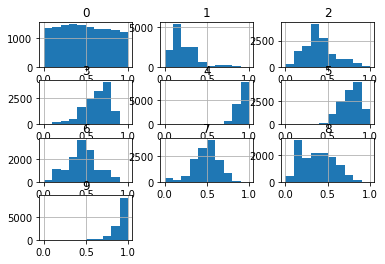

In [6]:
scalar = MinMaxScaler() 
scalar.fit(df)
ND = scalar.transform(df)
ND = pd.DataFrame(ND)
print(df.head())
print(ND.head())
ND.hist()

I created graphs for the detect differences between raw and normalized data

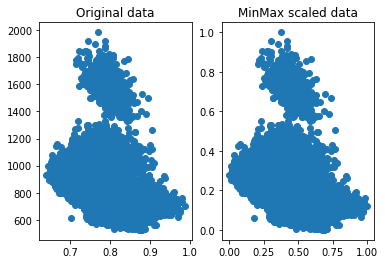

In [7]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(df.iloc[:,6], df.iloc[:,1])
axes[0].set_title("Original data")
axes[1].scatter(ND.iloc[:,6], ND.iloc[:,1])
axes[1].set_title("MinMax scaled data")
plt.show()


## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

I choose KMeans Clustering method. I drop class column so, clustering method can explore data while working with itself. It can detect unknowns of the data. It helps categorizing data. We know that we have 7 different class so we use this amount colour for the modeling clustering. I select different column relationship for see clustering model.

In [8]:
km = KMeans(n_clusters=7)
km.fit(ND)
y_km = km.predict(ND)

kmO = KMeans(n_clusters = 7)
kmO.fit(df)
y_kmO = kmO.predict(df)



## Clustering results<a class="anchor" id="clustering"></a>

From content of the graphs we can see and detect differences between clusters.

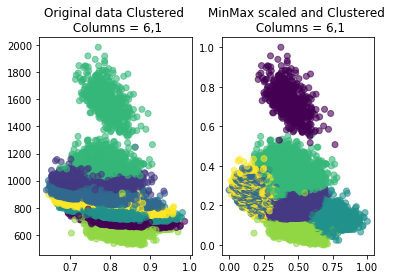

In [9]:
fig2, axes2 = plt.subplots(1,2)
axes2[0].scatter(df.iloc[:,6] , df.iloc[:,1], c=y_kmO 
                 ,alpha = 0.6)
axes2[0].set_title("Original data Clustered \n Columns = 6,1")
axes2[1].scatter( ND.iloc[:, 6],ND.iloc[:, 1], c=y_km 
                 ,alpha = 0.6)
axes2[1].set_title("MinMax scaled and Clustered \n Columns = 6,1")
plt.show()


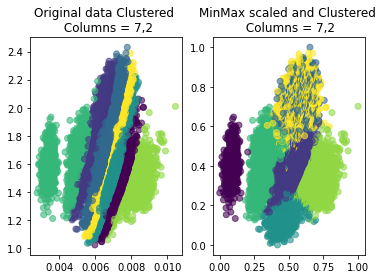

In [10]:
fig3, axes3 = plt.subplots(1,2)
axes3[0].scatter(df.iloc[:,7] , df.iloc[:,2], c=y_kmO 
                 ,alpha = 0.6)
axes3[0].set_title("Original data Clustered \n Columns = 7,2")
axes3[1].scatter( ND.iloc[:, 7],ND.iloc[:, 2], c=y_km 
                 ,alpha = 0.6)
axes3[1].set_title("MinMax scaled and Clustered \n Columns = 7,2")
plt.show()


Evaluate your Clustering model. Provide results, tables, charts, etc.


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

I need to normalized data for classification but I also need to train data for this process. After split test variables, I normalized variables for the classification. 

In [11]:
class_X = df.copy()
class_y = class_df.Class
X_train,X_test,y_train,y_test = train_test_split(class_X,class_y,test_size =0.20)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
class_X2 = df.copy()
class_y2 = class_df.Class
X2_train,X2_test,y2_train,y2_test = train_test_split(class_X2,class_y2,test_size =0.20)

I choose K Nearest Neighbors - Classification. First, I run 2 classification algorithms then it provides me best accuracy at training sets and test sets. The algorithm is simple and easy to implement. There’s no need to build a model, tune several parameters, or make additional assumptions. The algorithm is versatile. It can be electable for classification.


## Evaluation<a class="anchor" id="evaluation"></a>

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)


knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
print('Accuracy of K-NN classifier on training NOT normalized set: {:.2f}'
     .format(knn.score(X2_train, y2_train)))
print('Accuracy of K-NN classifier on test NOT normalized set: {:.2f}'
     .format(knn.score(X2_test, y2_test)))
y2_pred = knn.predict(X2_test)

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.92
Accuracy of K-NN classifier on training NOT normalized set: 0.85
Accuracy of K-NN classifier on test NOT normalized set: 0.79


I evalute program two times for normalized and not normalized data for detect differrences.

(Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

I choosed confusion_matrix for the visualization it can implement easily and show our classes relationship simple.

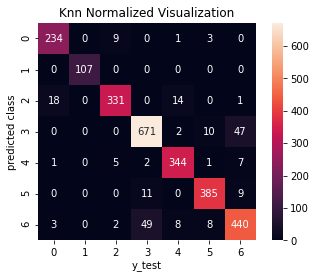

In [13]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("Knn Normalized Visualization")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

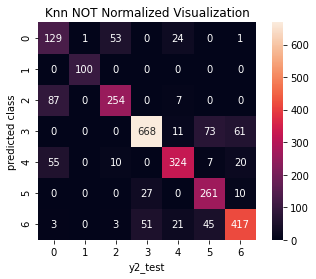

In [14]:
mat = confusion_matrix(y2_test, y2_pred)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("Knn NOT Normalized Visualization")
plt.xlabel('y2_test')
plt.ylabel('predicted class')
plt.show()

## References<a class="anchor" id="references"></a>

https://www.kaggle.com/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
https://stats.stackexchange.com/questions/58855/why-do-we-use-k-means-instead-of-other-algorithms
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79
https://medium.com/analytics-vidhya/prediction-and-data-visualization-of-breast-cancer-using-k-nearest-neighbor-knn-classifier-df7adadc4872


**Disclaimer!** <font color='grey'>This notebook was prepared by <Ozar Ömer Uncu> as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>